In [24]:
import requests
import json
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches

In [25]:
Denver_data = pd.read_csv('Bars_Denver.csv')
Boston_data = pd.read_csv('Bars_Boston.csv')
Denverft    = Denver_data.groupby(['Delivery'])['Buisness Rating'].mean().loc[False]
Denverrt    = Denver_data.groupby(['Delivery'])['Buisness Rating'].mean().loc[True]
DTF         = [Denverrt,Denverft]

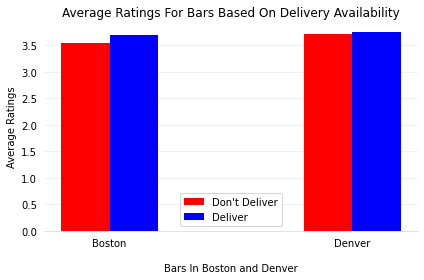

In [28]:
fig, ax   = plt.subplots()
labels    = ['Boston','Denver']
z         = np.arange(len(DTF))
bar_width = .2
rects1    = ax.bar(z,Boston_data.groupby(['Delivery'])['Buisness Rating'].mean(), 
                width = bar_width, label = "Don't Deliver",color ='r')
rects2    = ax.bar(z + bar_width, Denver_data.groupby(['Delivery'])['Buisness Rating'].mean(), 
                width = bar_width, label = 'Deliver', color ='b')
ax.set_ylabel('Average Ratings')
ax.set_title('Average Ratings For Bars Based On Delivery Availability')
ax.set_xticks(z + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel('Bars In Boston and Denver', labelpad=15)
fig.tight_layout()
plt.savefig('Avg_Ratings_Deliv.png')
plt.show()

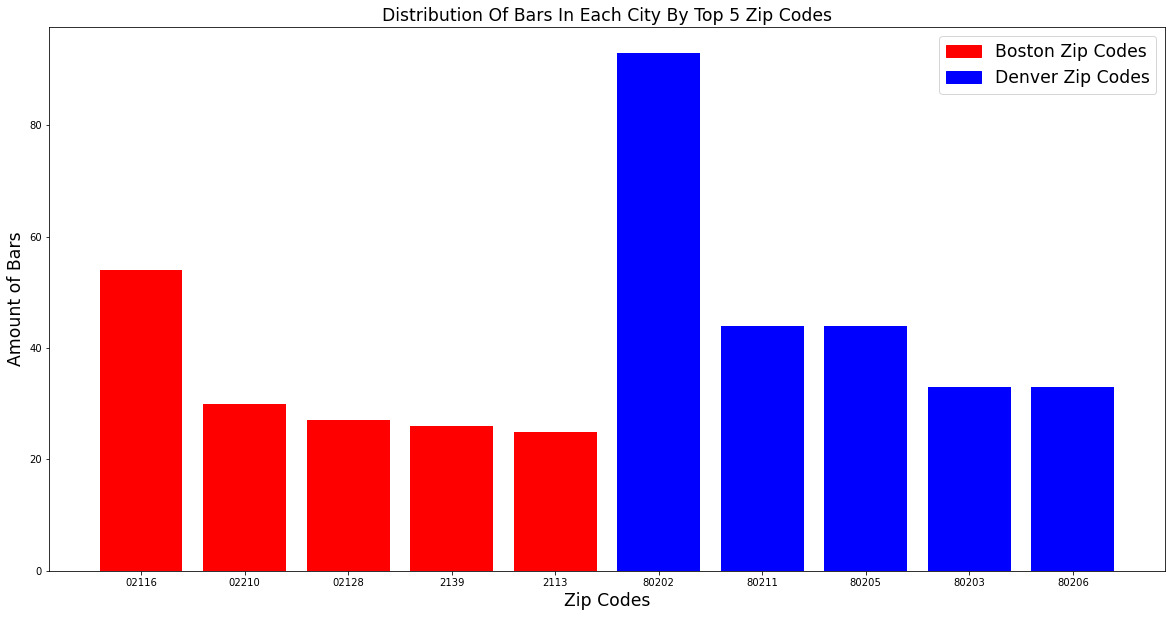

In [33]:
list1      = Boston_data['Zip Code'].value_counts().head().tolist()
list2      = Denver_data['Zip Code'].value_counts().head().tolist()
Amounts    = list1 + list2
fig, ax    = plt.subplots(figsize=(20,10))
my_colors  = list('rrrrrbbbbb')
ax.bar(['02116','02210','02128','2139','2113',
        '80202','80211','80205','80203','80206'],
        Amounts,color=my_colors)
ax.set_ylabel('Amount of Bars', fontsize = 'xx-large')
ax.set_xlabel('Zip Codes', fontsize = 'xx-large')
ax.set_title('Distribution Of Bars In Each City By Top 5 Zip Codes', fontsize = 'xx-large')
red_patch  = mpatches.Patch(color='red', label = 'Boston Zip Codes')
blue_patch = mpatches.Patch(color='blue', label = 'Denver Zip Codes')
plt.legend(handles=[red_patch,blue_patch],fontsize = 'xx-large')
plt.savefig('Top_Zip_Codes.png')
plt.show()

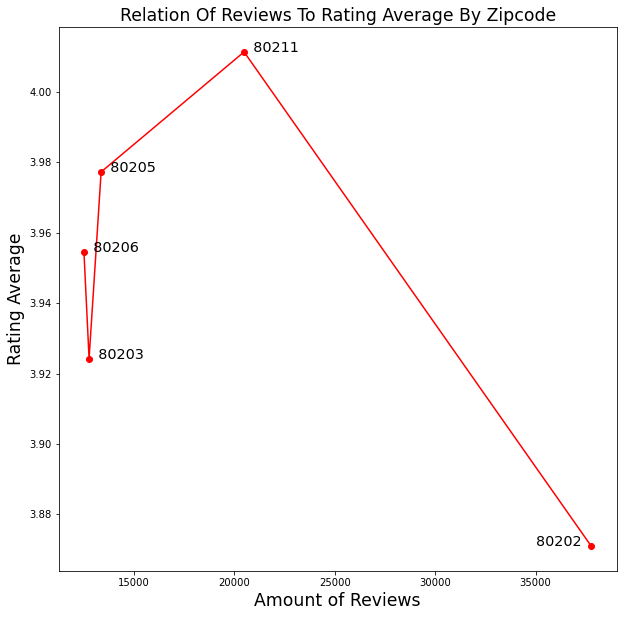

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
y       = [3.870967741935484,
           3.9242424242424243,
           3.977272727272727,
           3.9545454545454546,
           4.011363636363637]
x       = [37774, 12758, 13359, 12502, 20480]
x,y     = zip(*sorted(zip(x,y)))

ax.annotate('  80206',(x[0],y[0]),ha = 'left',fontsize  = 'x-large')
ax.annotate('  80203',(x[1],y[1]),ha = 'left',fontsize  = 'x-large')
ax.annotate('  80205',(x[2],y[2]),ha = 'left',fontsize  = 'x-large')
ax.annotate('  80211',(x[3],y[3]),ha = 'left',fontsize  = 'x-large')
ax.annotate('80202  ',(x[4],y[4]),ha = 'right',fontsize = 'x-large')
ax.plot(x,y,marker='o',color='r')

ax.set_xlabel('Amount of Reviews',fontsize = 'xx-large')
ax.set_ylabel('Rating Average',fontsize = 'xx-large')
ax.set_title('Relation Of Reviews To Rating Average By Zipcode',fontsize = 'xx-large')
plt.savefig('TopZipCodes.png')
plt.show()

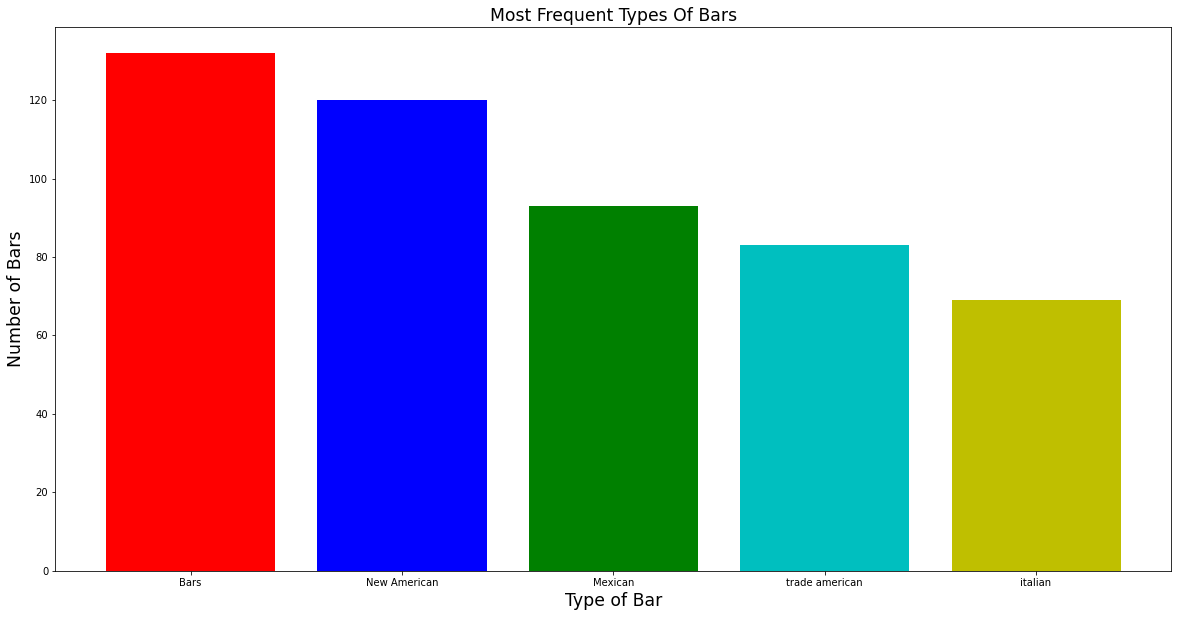

In [38]:
Denver_data.groupby('Categories')['Zip Code'].count().nlargest()
fig, ax   = plt.subplots(figsize=(20,10))
my_colors = list('rbgcy')

ax.bar(['Bars','New American','Mexican','trade american','italian',], 
       Denver_data.groupby('Categories')['Zip Code'].count().nlargest(),color=my_colors)
ax.set_ylabel('Number of Bars', fontsize = 'xx-large')
ax.set_xlabel('Type of Bar',fontsize = 'xx-large')
ax.set_title('Most Frequent Types Of Bars',fontsize = 'xx-large')
plt.savefig('TopCategories.png')
plt.show()